# Quantum Search
This is an algorithm which provides a quadratic speed up in search problems, and is commonly known as "Grover's Algorithm". <br> We map the data as qubits, and are presented with the problem of searching through the qubit register in which one or more states are 'pegged' - that is - they are the solution to the search problem.

In [22]:
from qiskit import *
import math
pi = math.pi
import numpy as np
from qiskit.visualization import plot_histogram

First we form the oracle whose task is to 'flip' the state of the pegged state, that is, it induces a negative global phase on that state. <br>
We will work with a four qubit register with the solution being $|0010\rangle$

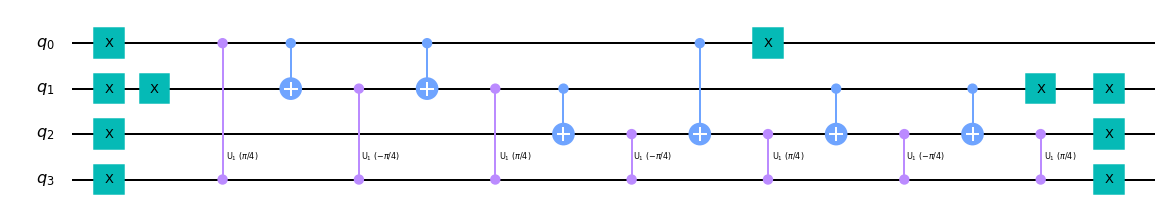

In [30]:
#initalising the oracle for pegging the state |0010>
qc_oracle = QuantumCircuit(4)
qc_oracle.x(1)
for i in range(4):
    qc_oracle.x(i)

qc_oracle.cu1(pi/4, 0, 3)
qc_oracle.cx(0, 1)
qc_oracle.cu1(-pi/4, 1, 3)
qc_oracle.cx(0, 1)
qc_oracle.cu1(pi/4, 1, 3)
qc_oracle.cx(1, 2)
qc_oracle.cu1(-pi/4, 2, 3)
qc_oracle.cx(0, 2)
qc_oracle.cu1(pi/4, 2, 3)
qc_oracle.cx(1, 2)
qc_oracle.cu1(-pi/4, 2, 3)
qc_oracle.cx(1, 2)
qc_oracle.cu1(pi/4, 2, 3)
    
qc_oracle.x(1)
for i in range(4):
    qc_oracle.x(i)
qc_oracle.name = '$O$'
qc_oracle.draw('mpl')

Next up, we formulate the grover circuit, which is to be applied to our main circuit a certain number of times to increase the coefficient of the pegged state and thus enabling us to get the result by a measurement. <br>
The grover circuit contains three parts-
1. Apply the oracle $O$.
2. Apply the hadamard transform $H^{\otimes n}$.
3. Induce a negative phase on all non zero states. (ie, $|0000\rangle$ remains unchanged while $|0001\rangle \dots |1111\rangle \rightsquigarrow -|0001\rangle \dots -|1111\rangle$)

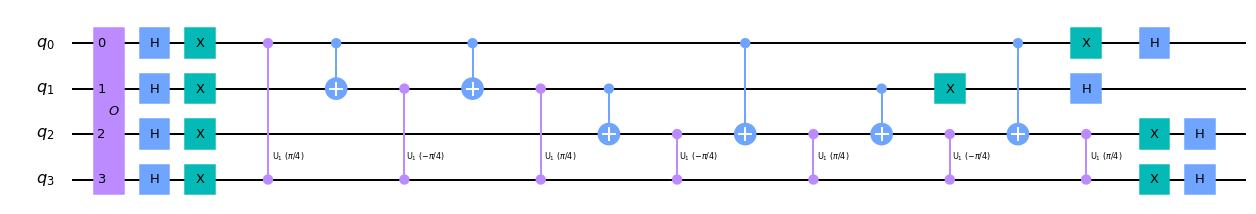

In [31]:
grover = QuantumCircuit(4)
grover.append(qc_oracle,range(0,4))
for i in range(4):
    grover.h(i)
for i in range(4):
    grover.x(i)
grover.cu1(pi/4, 0, 3)
grover.cx(0, 1)
grover.cu1(-pi/4, 1, 3)
grover.cx(0, 1)
grover.cu1(pi/4, 1, 3)
grover.cx(1, 2)
grover.cu1(-pi/4, 2, 3)
grover.cx(0, 2)
grover.cu1(pi/4, 2, 3)
grover.cx(1, 2)
grover.cu1(-pi/4, 2, 3)
grover.cx(0, 2)
grover.cu1(pi/4, 2, 3)

for i in range(4):
    grover.x(i)  
for i in range(4):
    grover.h(i)
grover.name = '$G$'
grover.draw('mpl')

Now we begin with the state 
$$|\psi_0\rangle = |0\rangle^{\otimes n}$$
We apply the hadamard transform to get the superposition,
$$|\psi_1\rangle = \sum_{x=0}^{n}|x\rangle$$ 
And then with a little abuse of notation we visualise the grover circuit as an operator $G$, and applying this to $|\psi_1\rangle$ we get,
$$|\psi_2\rangle = G|\psi_1\rangle$$

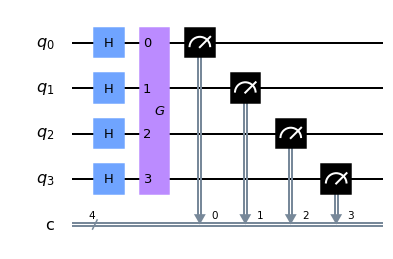

In [34]:
circ = QuantumCircuit(4,4)
for q in range(4):
    circ.h(q)
circ.append(grover,range(0,4))
#only one application of the grover circuit is needed here
for i in range(4):
    circ.measure(i,i)
circ.draw('mpl')

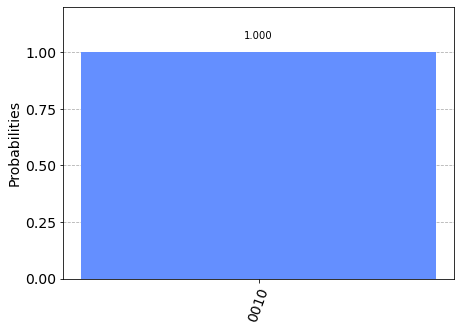

In [23]:
sim = Aer.get_backend('qasm_simulator')
job = execute(circ,sim,shots=1)
result = job.result()
count = result.get_counts()

plot_histogram(count)

And here we are! As expected, we measure the state $|0010\rangle$. Note, while we were able to measure this with full certainity, in more involved problems, we get probabilistic answers too.